In [202]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [203]:
df=pd.read_csv("height-weight.csv")
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Weight')

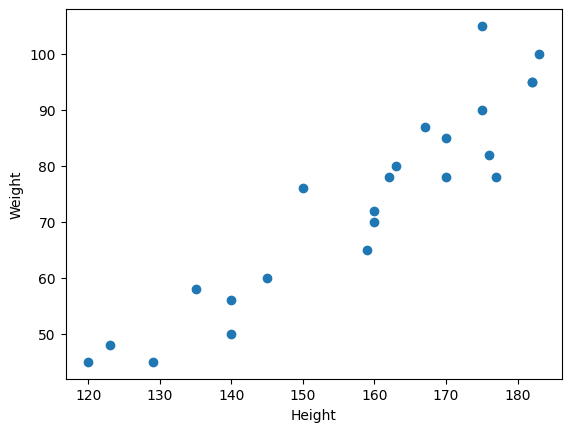

In [204]:
plt.scatter(df['Height'],df['Weight'])
plt.xlabel("Height")
plt.ylabel("Weight")

In [205]:
df.corr() #We can see correlation b/w Height and Weight and found that it has high correlation so we can use Linear Regression

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


In [206]:
X=df[['Height']] #We need a Dataframe for independent features
y=df['Weight'] #Series for Dependent Feature
print(type(X))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [207]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42) #Just like np.random.seed(42)

In [208]:
#Standardization of data for Mean=0 and Standard Deviation=1 to train model easily especially those who depend on Gradient Descent by converting data on a same scale which helps converging faster
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test) #We did transform() instead of fit_transform() as we don't want our test data to know any info about training data (Data Leakage)
X_test

array([[ 1.08169023],
       [ 0.68706708],
       [-2.13166967],
       [ 1.36356391],
       [ 0.066945  ],
       [ 0.96894076],
       [-1.28604865]])

In [209]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression(n_jobs=-1)
regression.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,-1
,positive,False


In [210]:
print(regression.coef_) #Will give us the slope of Best Fit Line
print(regression.intercept_) #Will give the intercept

[15.94039679]
73.375


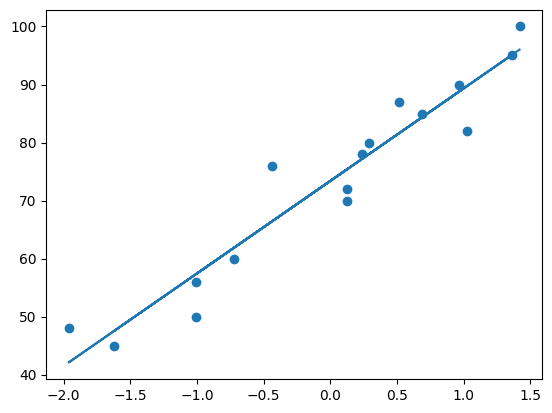

In [211]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train))

# y_pred=intercept+Slope(X_test)
# =>
y_pred=73.375+15.94039679(X_test)
Because Equation of Staright Line: y=mx+c

In [212]:
y_pred=regression.predict(X_test)
y_pred

array([90.61757148, 84.32712195, 39.3953396 , 95.11074971, 74.44212983,
       88.82030018, 52.8748743 ])

In [213]:
#Performance Metrices MSE,MAE,RMSE
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

86.83764016448553
7.915294125992937
9.31867158797248


In [214]:
#R Squared
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)

0.7668213301150926


In [215]:
#OLS Linear Regression
import statsmodels.api as sm
model=sm.OLS(X_train,y_train).fit()
predict=model.predict(X_test)
predict

array([ 0.00304666,  0.00193517, -0.006004  ,  0.00384058,  0.00018856,
        0.00272909, -0.00362225])

In [216]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.045
Model:                            OLS   Adj. R-squared (uncentered):             -0.019
Method:                 Least Squares   F-statistic:                             0.7051
Date:                Thu, 18 Dec 2025   Prob (F-statistic):                       0.414
Time:                        21:59:21   Log-Likelihood:                         -22.336
No. Observations:                  16   AIC:                                      46.67
Df Residuals:                      15   BIC:                                      47.44
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Weight         0.0028      0.003      0.840      0.414      -0.004       0.010
==============================================================================
Omnibus:                        1.088   Durbin-Watson:                   1.834
Prob(Omnibus):                  0.581   Jarque-Bera (JB):                0.941
Skew:                          -0.409   Prob(JB):                        0.625
Kurtosis:                       2.137   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""